In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import pathlib
from tensorflow.keras.preprocessing import image_dataset_from_directory


# df = pd.read_csv('final.csv')
# X = df[df.columns[0:784]].to_numpy()
# y = df[df.columns[-1]]
# y = y.astype(str)

In [5]:
PATH = str(pathlib.Path().resolve())
train_dir = os.path.join(PATH, 'Train')
validation_dir = os.path.join(PATH, 'Validation')

BATCH_SIZE = 1024
IMG_SIZE = (28, 28)

train_dataset = image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE, color_mode='grayscale')
validation_dataset = image_dataset_from_directory(validation_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE, color_mode='grayscale')
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

cnn = tf.keras.models.Sequential() 
cnn.add(tf.keras.layers.Input(shape=(28, 28, 1)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(IMG_SIZE[0], IMG_SIZE[1])))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), padding='valid', activation='relu'))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(activation = 'relu', units = 128))
cnn.add(tf.keras.layers.Dense(activation = 'relu', units = 64))
cnn.add(tf.keras.layers.Dense(activation = 'softmax', units = 39))
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

Found 834036 files belonging to 39 classes.
Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-10-25 15:19:10.231527: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-25 15:19:10.232088: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 22524 files belonging to 39 classes.


In [6]:
cnn.fit(train_dataset, epochs = 15, validation_data = validation_dataset, callbacks=[model_checkpoint_callback])

Epoch 1/15


2022-10-25 15:19:15.950741: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-25 15:19:15.952205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


815/815 [==============================] - ETA: 0s - loss: 0.7570 - accuracy: 0.8646

2022-10-25 15:20:05.961795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


815/815 [==============================] - 52s 59ms/step - loss: 0.7570 - accuracy: 0.8646 - val_loss: 0.2663 - val_accuracy: 0.9209
Epoch 2/15
815/815 [==============================] - 49s 60ms/step - loss: 0.1974 - accuracy: 0.9348 - val_loss: 0.2294 - val_accuracy: 0.9316
Epoch 3/15
815/815 [==============================] - 51s 62ms/step - loss: 0.1729 - accuracy: 0.9417 - val_loss: 0.2278 - val_accuracy: 0.9295
Epoch 4/15
815/815 [==============================] - 50s 61ms/step - loss: 0.1582 - accuracy: 0.9460 - val_loss: 0.2213 - val_accuracy: 0.9328
Epoch 5/15
815/815 [==============================] - 52s 63ms/step - loss: 0.1477 - accuracy: 0.9488 - val_loss: 0.2149 - val_accuracy: 0.9324
Epoch 6/15
815/815 [==============================] - 50s 61ms/step - loss: 0.1393 - accuracy: 0.9511 - val_loss: 0.2185 - val_accuracy: 0.9342
Epoch 7/15
815/815 [==============================] - 52s 64ms/step - loss: 0.1326 - accuracy: 0.9529 - val_loss: 0.2266 - val_accuracy: 0.9315
Epo

In [7]:
cnn.save('recognition.h5')

In [8]:
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("model.h5")

In [9]:
class_name = len(train_dataset.class_names)
class_arr = train_dataset.class_names
print("Total class number: {}".format(class_name))
print("All Label: {}".format(class_arr))

Total class number: 39
All Label: ['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [10]:
test_acc = cnn.evaluate(test_dataset)

4/4 [==============================] - 0s 43ms/step - loss: 0.2804 - accuracy: 0.9407


2022-10-25 17:08:54.957143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 621ms/step
This is the index of prediction: 18
The correct answer is: E


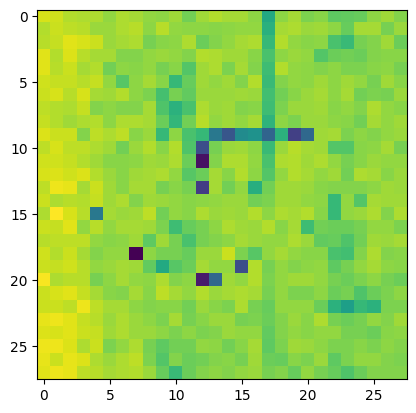

In [12]:
path = './G.jpg'

img_data = tf.keras.utils.load_img(
    path,
    color_mode='grayscale',
    target_size=(28, 28),
    interpolation='nearest',
    keep_aspect_ratio=True
)
plt.imshow(img_data)

array = tf.keras.preprocessing.image.img_to_array(img_data)
array = np.array([array])

predictions = cnn.predict(array)
prediction = predictions.argmax()
print('This is the index of prediction:', prediction)
print('The correct answer is:', class_arr[prediction])

In [172]:
import cv2 as cv

file = './G.jpg'
img = cv.imread(file, cv.IMREAD_GRAYSCALE)
new_img = cv.resize(img, (28, 28), interpolation = cv.INTER_AREA)
# np_img = np.array(new_img)

array = np.array([new_img])
predictions = cnn.predict(array)
prediction = predictions.argmax()
print('This is the index of prediction:', prediction)
print('The correct answer is:', class_arr[prediction])

1/1 [==============================] - 0s 14ms/step
This is the index of prediction: 7
The correct answer is: 4


In [1]:
import tensorflow as tf

cnn_mod = tf.keras.models.load_model('')

OSError: No file or directory found at ./recognition_v6.h5

In [189]:
import cv2 as cv
import matplotlib.pyplot as plt

file = './G.jpg'
img = cv.imread(file)
ret, output = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
output = cv.cvtColor(output, cv.COLOR_BGR2GRAY)
new_img = cv.resize(output, (28, 28), interpolation = cv.INTER_AREA)
# np_img = np.array(new_img)


array = np.array([new_img])
predictions = cnn_model.predict(array)
prediction = predictions.argmax()
print('This is the index of prediction:', prediction)
print('The correct answer is:', class_arr[prediction])

1/1 [==============================] - 0s 14ms/step
This is the index of prediction: 12
The correct answer is: 9
